# Análise de Resultados - Experimento RCBD

Comparação de métodos de otimização de hiperparâmetros para SVM

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')

df = pd.read_csv('../results/experimento_rcbd_resultados.csv')
df.head(10)

,dataset,seed,metodo,acuracia,precisao,recall,f1_score,tempo,best_params
0,Breast Cancer,1,GridSearch,0.973684,0.975610,0.952381,0.963855,0.396202,"{'C': np.float64(21.544346900318846), 'gamma':..."
1,Breast Cancer,1,RandomSearch,0.973684,0.975610,0.952381,0.963855,0.250029,"{'C': 145.28246637516034, 'gamma': 0.001152644..."
2,Breast Cancer,1,BayesianOptimization,0.973684,0.975610,0.952381,0.963855,1.790803,"{'C': 96.09812947036423, 'gamma': 0.0008263688..."
3,Titanic,1,GridSearch,0.854749,0.905660,0.695652,0.786885,0.868064,"{'C': np.float64(1000.0), 'gamma': np.float64(..."
4,Titanic,1,RandomSearch,0.832402,0.809524,0.739130,0.772727,0.428746,"{'C': 45.70563099801451, 'gamma': 0.0984673887..."
5,Titanic,1,BayesianOptimization,0.826816,0.796875,0.739130,0.766917,2.381676,"{'C': 79.15074397656232, 'gamma': 0.0964385761..."
6,Water Potability,1,GridSearch,0.690549,0.819277,0.265625,0.401180,8.321138,"{'C': np.float64(1000.0), 'gamma': np.float64(..."
7,Water Potability,1,RandomSearch,0.690549,0.624413,0.519531,0.567164,6.188711,"{'C': 45.70563099801451, 'gamma': 0.0984673887..."
8,Water Potability,1,BayesianOptimization,0.701220,0.656250,0.492188,0.562500,14.486199,"{'C': 46.146880413436214, 'gamma': 0.072936792..."
9,Employee,1,GridSearch,0.839957,0.848980,0.650000,0.736283,21.420688,"{'C': np.float64(1000.0), 'gamma': np.float64(..."


In [7]:
print(f"Shape: {df.shape}")
print(f"\nMétodos: {df['metodo'].unique()}")
print(f"Datasets: {df['dataset'].unique()}")
print(f"\nEstatísticas por Método:\n")
print(df.groupby('metodo')[['acuracia', 'precisao', 'recall', 'f1_score', 'tempo']].agg(['mean', 'std']).round(4))

Shape: (105, 9)

Métodos: ['GridSearch' 'RandomSearch' 'BayesianOptimization']
Datasets: ['Breast Cancer' 'Titanic' 'Water Potability' 'Employee' 'Weather']

Estatísticas por Método:

                     acuracia         precisao          recall          \
                         mean     std     mean     std    mean     std   
metodo                                                                   
BayesianOptimization   0.8379  0.0943   0.8257  0.1068  0.6376  0.1956   
GridSearch             0.8366  0.0952   0.8491  0.0962  0.6037  0.2185   
RandomSearch           0.8336  0.0983   0.8337  0.1147  0.6284  0.2114   

                     f1_score            tempo           
                         mean     std     mean      std  
metodo                                                   
BayesianOptimization   0.7124  0.1642  27.0654  29.7620  
GridSearch             0.6923  0.1883  27.7483  41.9337  
RandomSearch           0.6991  0.1883  19.8942  32.4827  


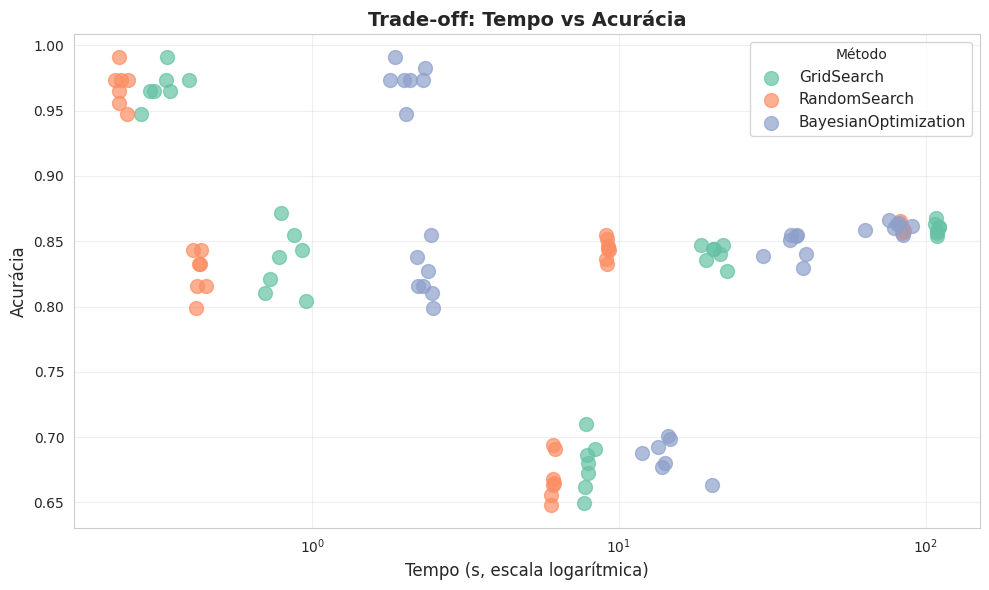

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

for metodo in df['metodo'].unique():
    subset = df[df['metodo'] == metodo]
    ax.scatter(subset['tempo'], subset['acuracia'], label=metodo, s=100, alpha=0.7)

ax.set_xscale('log')
ax.set_xlabel('Tempo (s, escala logarítmica)', fontsize=12)
ax.set_ylabel('Acurácia', fontsize=12)
ax.set_title('Trade-off: Tempo vs Acurácia', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, title='Método')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

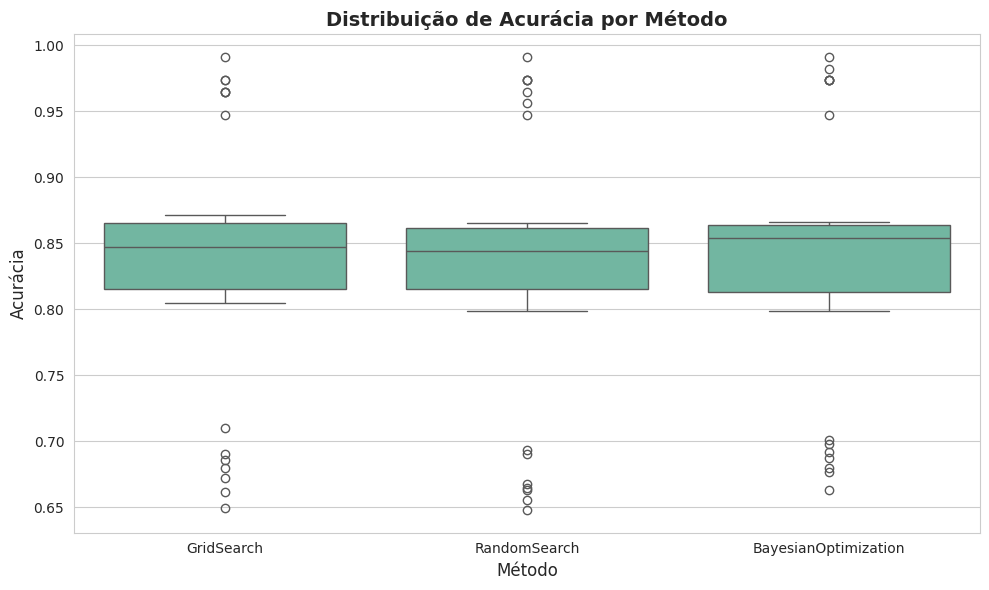

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='acuracia', ax=ax)

ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Acurácia', fontsize=12)
ax.set_title('Distribuição de Acurácia por Método', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

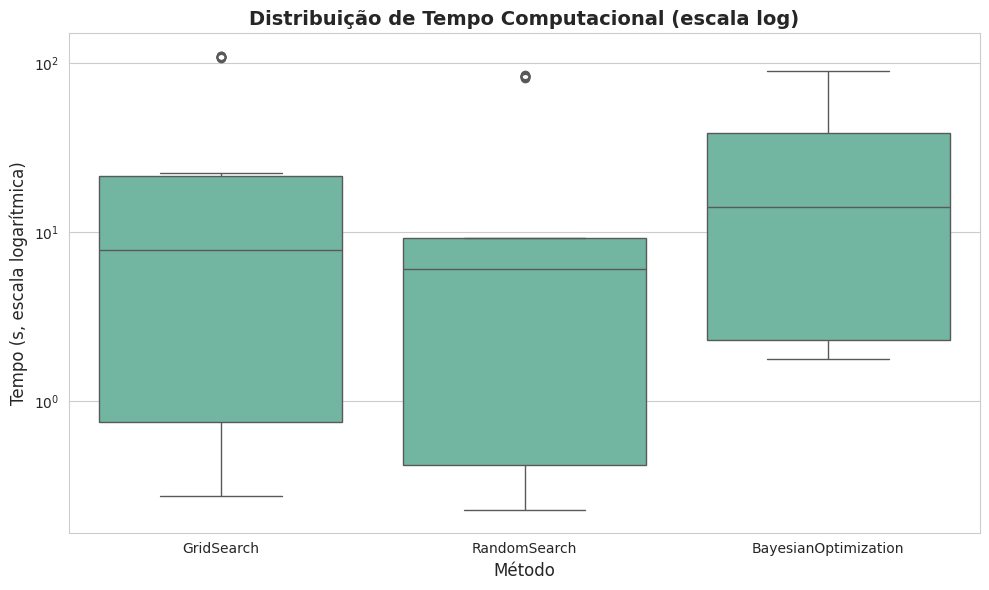

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='tempo', ax=ax)

ax.set_yscale('log')
ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Tempo (s, escala logarítmica)', fontsize=12)
ax.set_title('Distribuição de Tempo Computacional (escala log)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

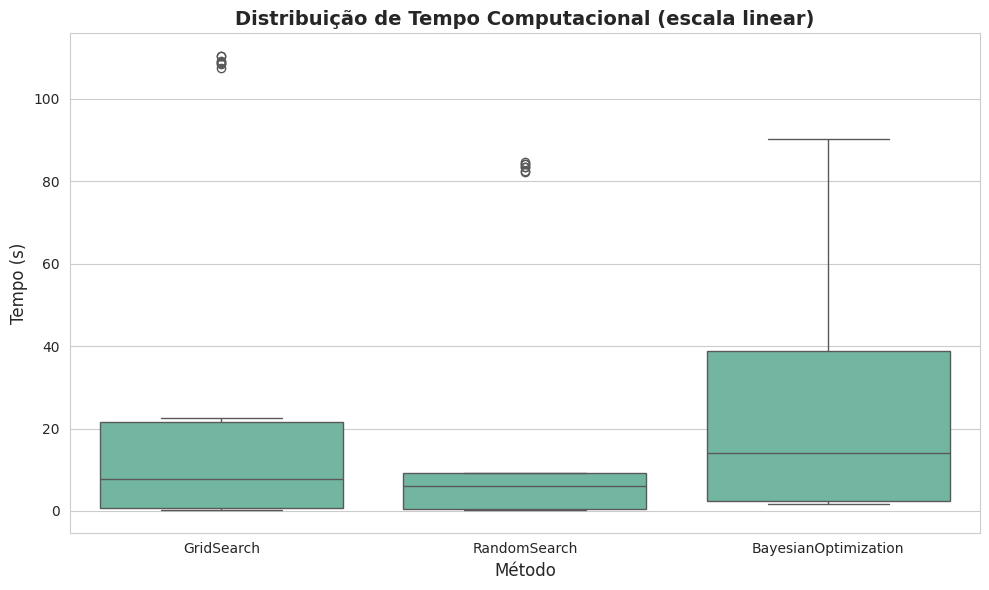

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='tempo', ax=ax)

ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Tempo (s)', fontsize=12)
ax.set_title('Distribuição de Tempo Computacional (escala linear)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

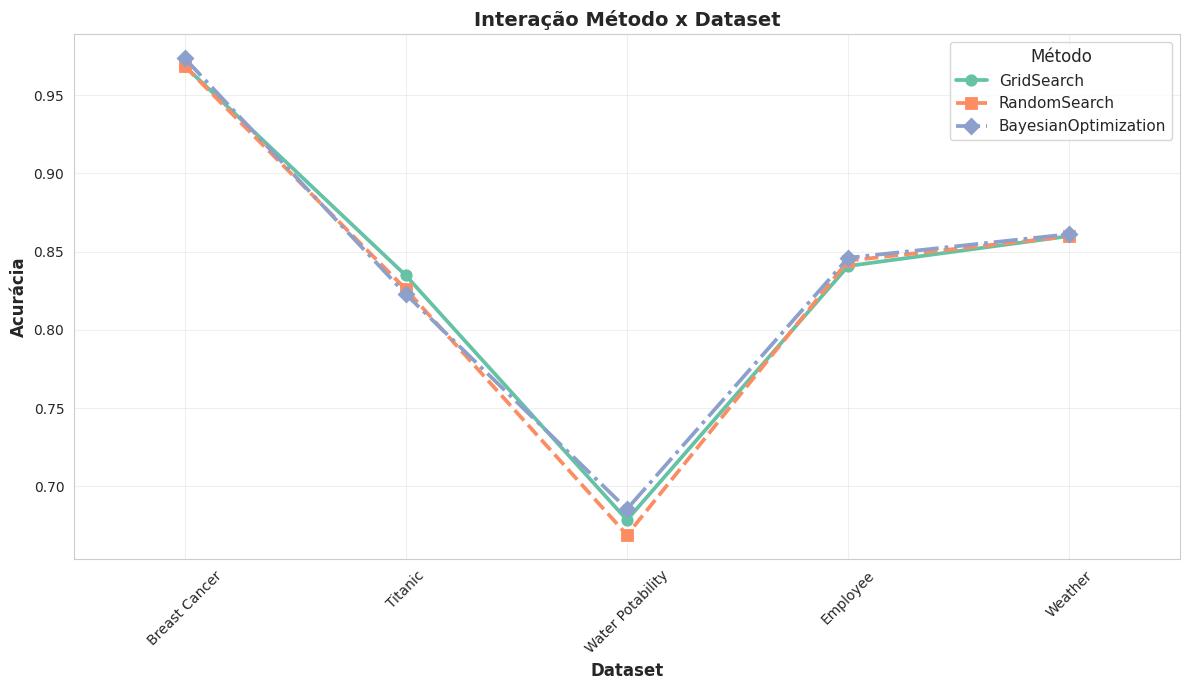

In [13]:
# Gráfico de Interação: Método x Dataset
fig, ax = plt.subplots(figsize=(12, 7))

sns.pointplot(
    data=df, 
    x='dataset', 
    y='acuracia', 
    hue='metodo',
    errorbar=None,  # Remove barras de erro
    markers=['o', 's', 'D'],  # Marcadores distintos: círculo, quadrado, diamante
    linestyles=['-', '--', '-.'],  # Estilos de linha distintos
    ax=ax
)

# Configurações de estilo e layout
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Acurácia', fontsize=12, fontweight='bold')
ax.set_title('Interação Método x Dataset', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Método', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

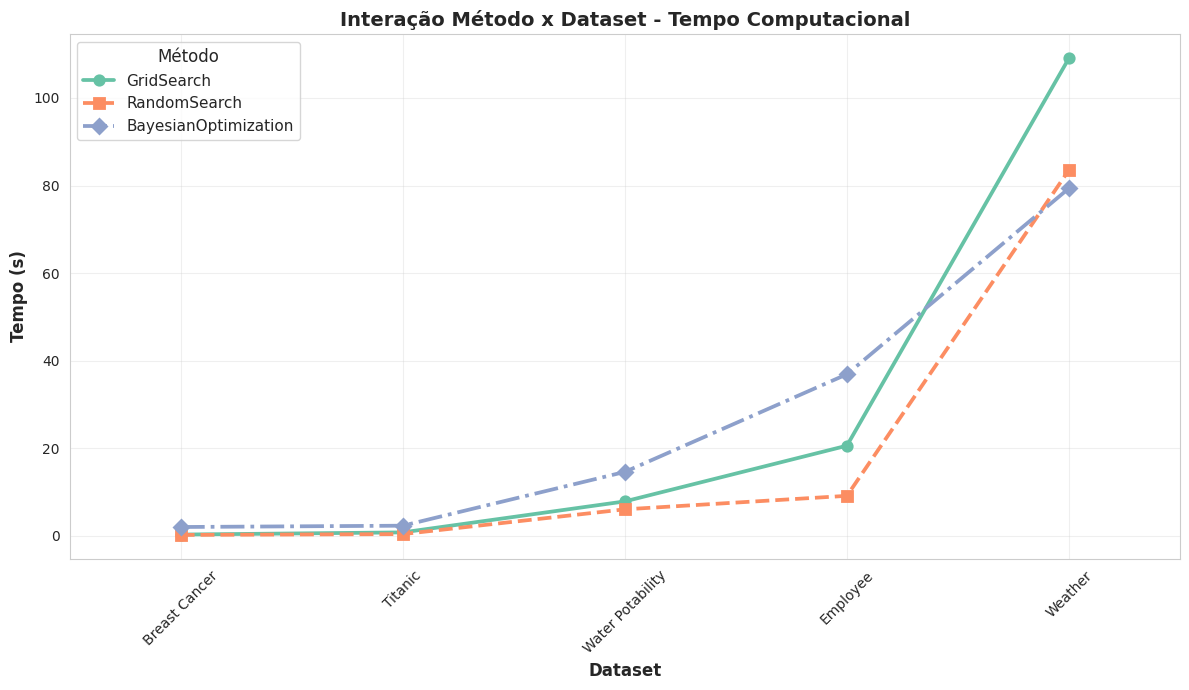

In [14]:
# Gráfico de Interação: Método x Dataset (Tempo)
fig, ax = plt.subplots(figsize=(12, 7))

sns.pointplot(
    data=df, 
    x='dataset', 
    y='tempo', 
    hue='metodo',
    errorbar=None,  # Remove barras de erro
    markers=['o', 's', 'D'],  # Marcadores distintos: círculo, quadrado, diamante
    linestyles=['-', '--', '-.'],  # Estilos de linha distintos
    ax=ax
)

# Configurações de estilo e layout
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Tempo (s)', fontsize=12, fontweight='bold')
ax.set_title('Interação Método x Dataset - Tempo Computacional', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Método', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

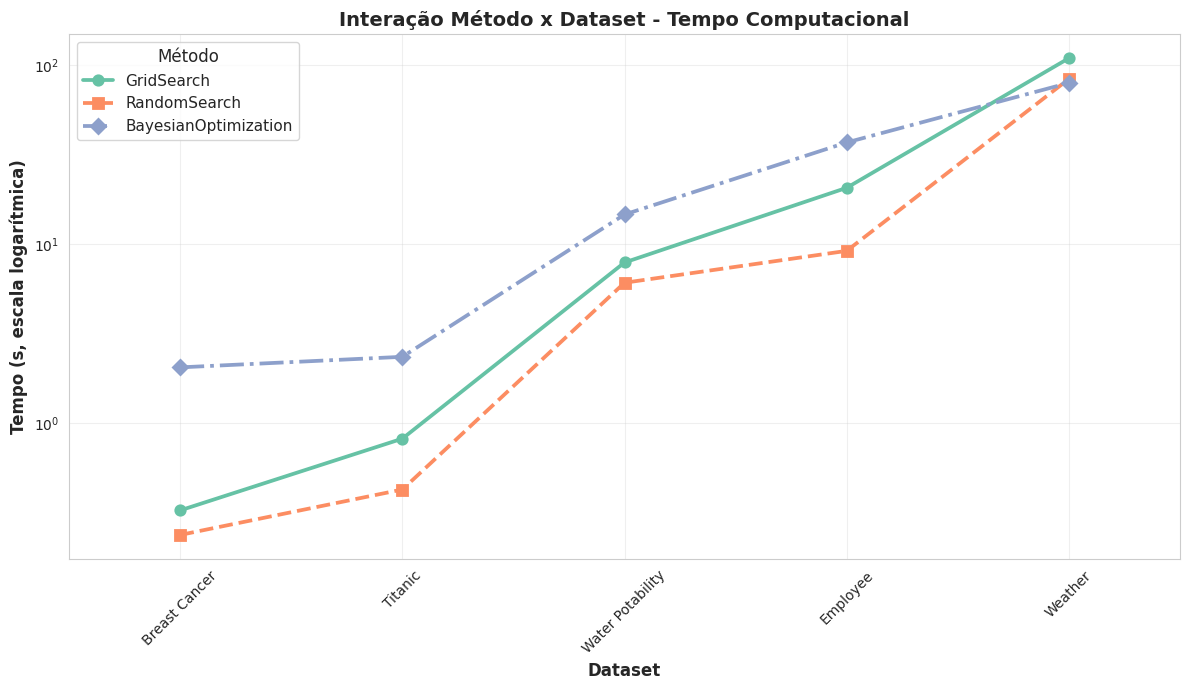

In [16]:
# Gráfico de Interação: Método x Dataset (Tempo - escala log)
fig, ax = plt.subplots(figsize=(12, 7))

sns.pointplot(
    data=df, 
    x='dataset', 
    y='tempo', 
    hue='metodo',
    errorbar=None,
    markers=['o', 's', 'D'],
    linestyles=['-', '--', '-.'],
    ax=ax
)

ax.set_yscale('log')  # Escala logarítmica
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Tempo (s, escala logarítmica)', fontsize=12, fontweight='bold')
ax.set_title('Interação Método x Dataset - Tempo Computacional', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Método', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\n=== RESUMO EXECUTIVO ===")
print(f"\nMelhor Acurácia Geral: {df['acuracia'].max():.4f}")
best_acc_row = df[df['acuracia'] == df['acuracia'].max()].iloc[0]
print(f"  Dataset: {best_acc_row['dataset']}, Método: {best_acc_row['metodo']}, Seed: {best_acc_row['seed']}")

print(f"\nMétodo Mais Rápido (tempo médio):")
fastest = df.groupby('metodo')['tempo'].mean().idxmin()
print(f"  {fastest}: {df.groupby('metodo')['tempo'].mean()[fastest]:.3f}s")

print(f"\nMétodo com Melhor Acurácia Média:")
best_method = df.groupby('metodo')['acuracia'].mean().idxmax()
print(f"  {best_method}: {df.groupby('metodo')['acuracia'].mean()[best_method]:.4f}")

print(f"\nRanking por Acurácia Média:")
ranking = df.groupby('metodo')['acuracia'].mean().sort_values(ascending=False)
for i, (metodo, acc) in enumerate(ranking.items(), 1):
    print(f"  {i}. {metodo}: {acc:.4f}")


=== RESUMO EXECUTIVO ===

Melhor Acurácia Geral: 0.9912
  Dataset: Breast Cancer, Método: GridSearch, Seed: 3

Método Mais Rápido (tempo médio):
  RandomSearch: 19.894s

Método com Melhor Acurácia Média:
  BayesianOptimization: 0.8379

Ranking por Acurácia Média:
  1. BayesianOptimization: 0.8379
  2. GridSearch: 0.8366
  3. RandomSearch: 0.8336
